  ## <font color = Lightgreen>       MACHINE LEARNING PROJECT       </fonts>

##### <font color = lightpink>Problem Description:</fonts>

##### <font color = Lightpink> Business Goal :</fonts>

##### <font color = Lightpink> Dataset :</fonts>

https://drive.google.com/file/d/1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP/view?usp=drive_link 

   ###  <font color = lightblue>1. LOADING AND PREPROCESSING:</fonts>
   ###### Load the dataset and perform necessary preprocessing steps

In [293]:
#Import necessary Libraries
import numpy as np 
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [295]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [297]:
#Load the dataset
df = pd.read_csv("C:\\Users\\hp\\Downloads\\CarPrice_Assignment.csv")

In [415]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,-1.660020,1.710980,2,0,0,1,0,2,0,-2.040199,...,0.443668,4,0.654839,-2.145018,0.228345,0.356303,-0.474285,-0.752858,-0.685708,13495.0
1,-1.643586,1.710980,3,0,0,1,0,2,0,-2.040199,...,0.443668,4,0.654839,-2.145018,0.228345,0.356303,-0.474285,-0.752858,-0.685708,16500.0
2,-1.627153,0.093685,1,0,0,1,2,2,0,-0.719291,...,1.264569,4,-2.479293,0.807373,0.228345,1.742211,-0.474285,-1.116001,-0.862526,16500.0
3,-1.610719,0.902332,4,0,0,0,3,1,0,0.467287,...,-0.339918,4,-0.455992,0.545768,1.745710,0.066230,0.762324,-0.208143,-0.155255,13950.0
4,-1.594285,0.902332,5,0,0,0,3,0,0,0.377734,...,0.667550,4,-0.455992,0.545768,-1.289020,0.485225,0.762324,-1.297572,-1.569797,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1.610318,-1.523610,117,0,1,0,4,2,0,1.474758,...,0.443668,4,1.249927,-0.388532,-2.047702,2.000055,-0.226963,-1.479144,-1.569797,18950.0
200,1.626752,-1.523610,113,0,0,0,3,2,0,2.549395,...,0.854118,4,1.884688,-0.388532,0.987027,0.452995,0.515002,-0.389714,-0.508890,16845.0
201,1.643186,-1.523610,112,0,1,0,3,2,0,2.549395,...,0.854118,4,1.884688,-0.388532,-0.226865,1.935594,0.267681,-1.116001,-1.039344,19045.0
202,1.659620,-1.523610,114,0,0,0,3,2,0,2.549395,...,2.048155,4,1.091237,-1.434949,-0.075128,1.097603,0.762324,-1.297572,-1.392979,21485.0


In [299]:
print("First five rows:")
df.head()

First five rows:


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [301]:
print("Shape of dataset:" ,df.shape)

Shape of dataset: (205, 26)


In [303]:
print("Feature properties of dataset:")
df.info()

Feature properties of dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize   

In [305]:
print("Statistical Analysis of the dataset:")
df.describe()

Statistical Analysis of the dataset:


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [307]:
print("Checking for missing values:")
print( df.isnull().sum())

Checking for missing values:
car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [309]:
#Checking Duplicates in dataset
print("Duplicates:" , df.duplicated().sum())

Duplicates: 0


##### <font color = lightpink> UNIVARIATE ANALYSIS:</fonts>

In [311]:
#import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

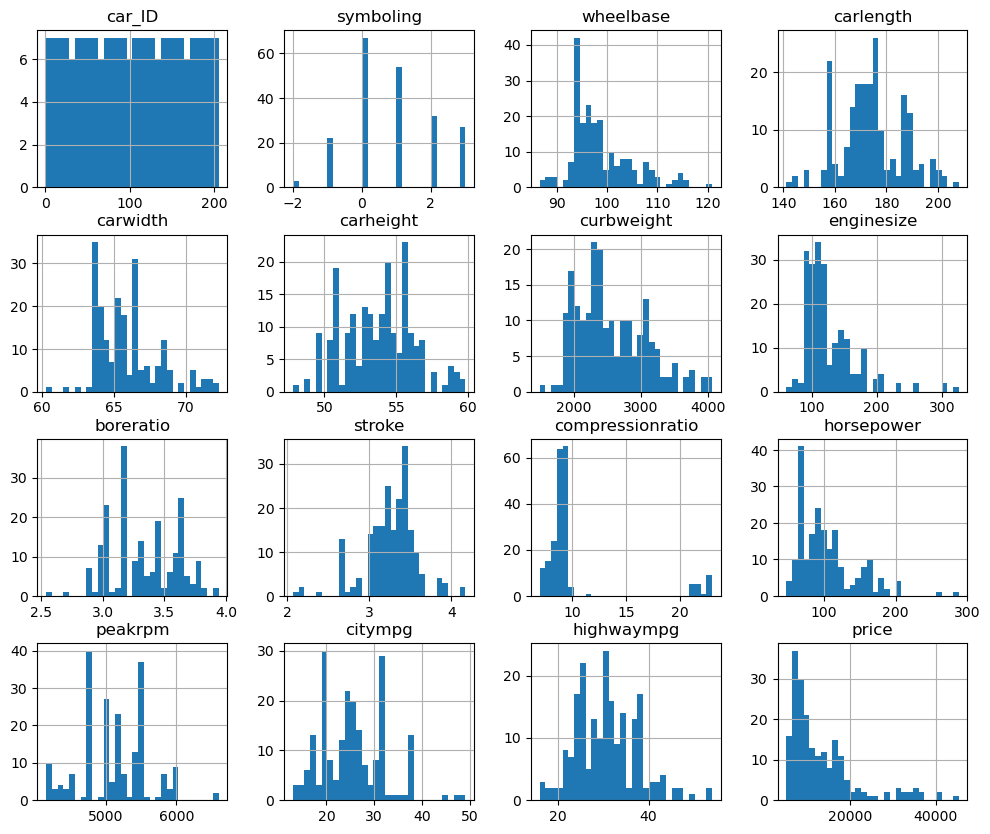

In [313]:
#Histogram for numerical columns
numerical_cols = df.select_dtypes(include=['int64','float64']).columns
df[numerical_cols].hist(figsize =(12,10) , bins =30)
plt.show

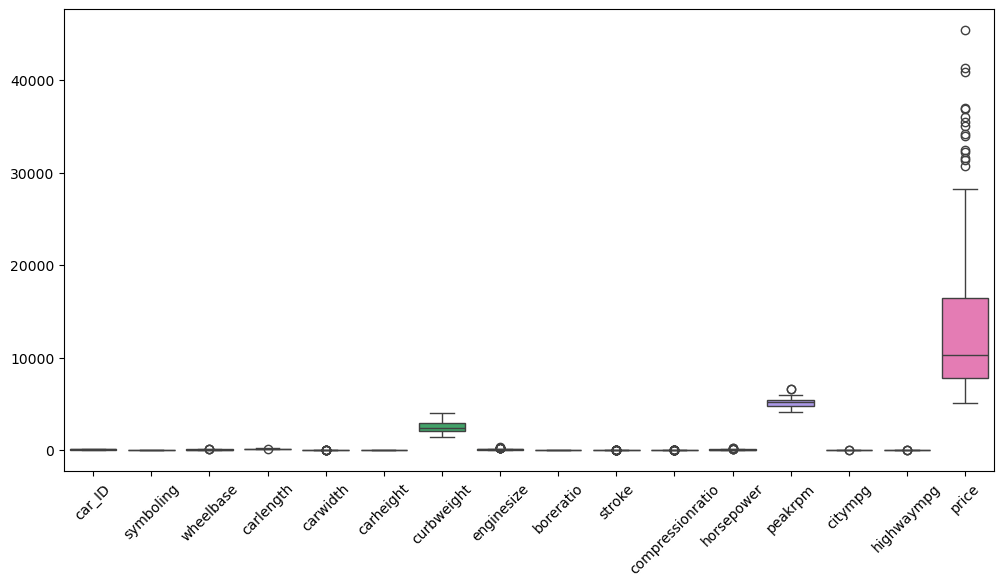

In [314]:
#Boxplot for Numeric columns and price
plt.figure(figsize=(12,6))
sns.boxplot(data = df[numerical_cols])
plt.xticks(rotation=45)
plt.show()

##### <font color = lightpink> BIVARIATE ANALYSIS:</fonts>

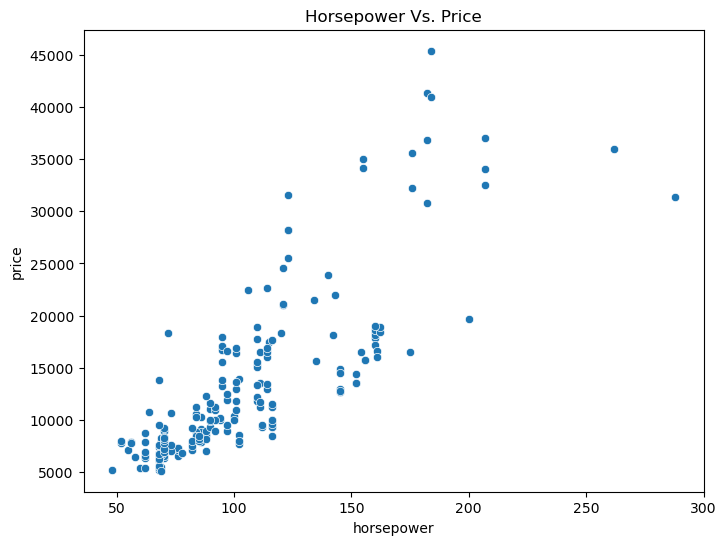

In [319]:
#Scatterplot for Horsepower Vs Price
plt.figure(figsize =(8,6))
sns.scatterplot(x=df["horsepower"],y=df["price"])
plt.title("Horsepower Vs. Price")
plt.show()

In [321]:
#Compute Correlation matrix of numerical columns
corr_matrix = df[numerical_cols].corr()

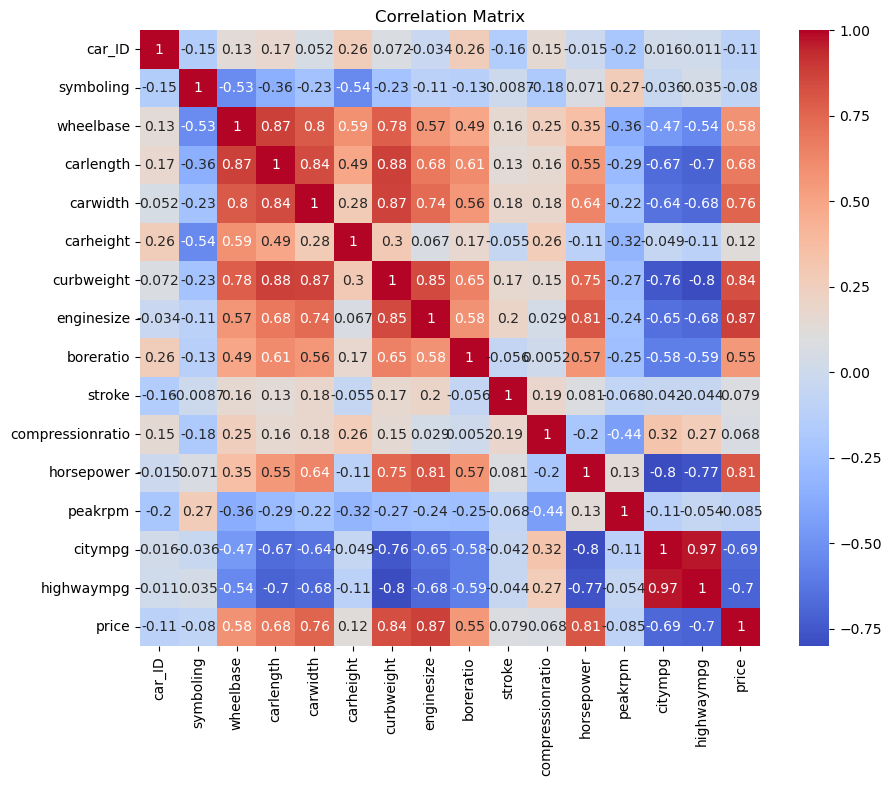

In [323]:
#Plot the Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix , annot = True ,cmap ='coolwarm')
plt.title("Correlation Matrix")
plt.show()

##### <font color = lightpink>MULTIVARIATE ANALYSIS:</fonts>

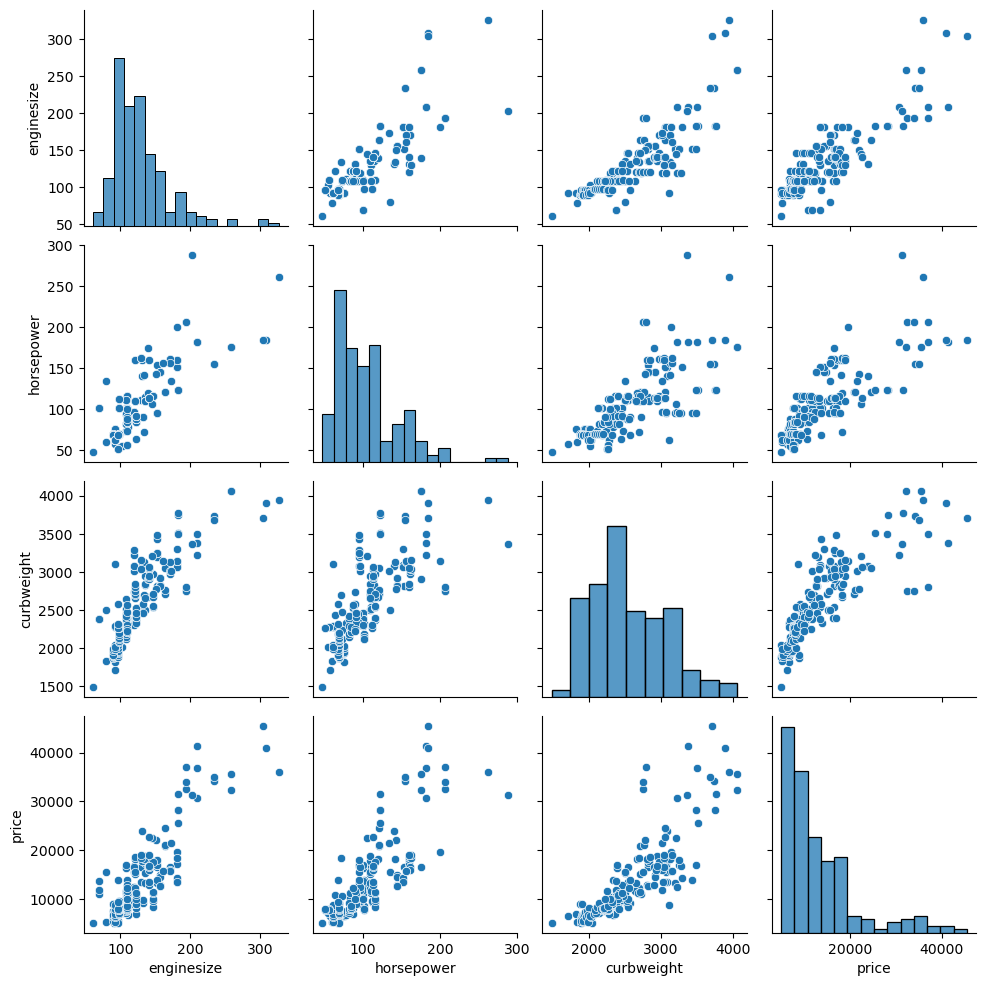

In [324]:
#Pairplot of different features
sns.pairplot(df[['enginesize','horsepower','curbweight','price']])
plt.show()

DATA CLEANING 

In [331]:
# Handling Outliers
from scipy.stats import zscore

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns  # Numeric columns
z_scores = np.abs(zscore(df[numeric_cols]))
df = df[(z_scores < 3).all(axis=1)]

In [333]:
#ENCODING
categorical_columns=['CarName','fueltype','aspiration','doornumber','carbody','drivewheel', 
                     'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'] 
#Object creation
label_encoder = LabelEncoder()

#Convert Categorical variable to numeric
for column in categorical_columns:
    df[column] =label_encoder.fit_transform(df[column])
    
#Show updated data   
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,2,0,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,3,0,0,1,0,2,0,88.6,...,130,4,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,1,0,0,1,2,2,0,94.5,...,152,4,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,4,0,0,0,3,1,0,99.8,...,109,4,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,5,0,0,0,3,0,0,99.4,...,136,4,3.19,3.40,8.0,115,5500,18,22,17450.0


In [335]:
#FEATURE SCALING using Standard Scaler
#Object creation
Scaler = StandardScaler()
Scaled_data = numeric_cols.drop('price')
#Fit and transform
df[Scaled_data] = Scaler.fit_transform(df[Scaled_data])
df[Scaled_data]

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,-1.660020,1.710980,-2.040199,-0.318510,-0.835132,-1.968703,0.249637,0.443668,0.654839,-2.145018,0.228345,0.356303,-0.474285,-0.752858,-0.685708
1,-1.643586,1.710980,-2.040199,-0.318510,-0.835132,-1.968703,0.249637,0.443668,0.654839,-2.145018,0.228345,0.356303,-0.474285,-0.752858,-0.685708
2,-1.627153,0.093685,-0.719291,-0.090656,0.000728,-0.465441,0.930946,1.264569,-2.479293,0.807373,0.228345,1.742211,-0.474285,-1.116001,-0.862526
3,-1.610719,0.902332,0.467287,0.422018,0.418658,0.327947,-0.273113,-0.339918,-0.455992,0.545768,1.745710,0.066230,0.762324,-0.208143,-0.155255
4,-1.594285,0.902332,0.377734,0.422018,0.538066,0.327947,0.933423,0.667550,-0.455992,0.545768,-1.289020,0.485225,0.762324,-1.297572,-1.569797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,1.610318,-1.523610,1.474758,1.580280,1.015701,1.664180,1.758426,0.443668,1.249927,-0.388532,-2.047702,2.000055,-0.226963,-1.479144,-1.569797
200,1.626752,-1.523610,2.549395,1.580280,2.030673,0.829035,1.250542,0.854118,1.884688,-0.388532,0.987027,0.452995,0.515002,-0.389714,-0.508890
201,1.643186,-1.523610,2.549395,1.580280,1.970969,0.829035,1.490858,0.854118,1.884688,-0.388532,-0.226865,1.935594,0.267681,-1.116001,-1.039344
202,1.659620,-1.523610,2.549395,1.580280,2.030673,0.829035,1.399191,2.048155,1.091237,-1.434949,-0.075128,1.097603,0.762324,-1.297572,-1.392979


In [337]:
#Splitting the data into Features and target variable 
X = df.drop('price' , axis=1)
Y = df['price']

In [339]:
#Train Test Split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 42)

In [341]:
print("Preprocessed Data Frame:")
print(df.head())

Preprocessed Data Frame:
     car_ID  symboling  CarName  fueltype  aspiration  doornumber  carbody  \
0 -1.660020   1.710980        2         0           0           1        0   
1 -1.643586   1.710980        3         0           0           1        0   
2 -1.627153   0.093685        1         0           0           1        2   
3 -1.610719   0.902332        4         0           0           0        3   
4 -1.594285   0.902332        5         0           0           0        3   

   drivewheel  enginelocation  wheelbase  ...  enginesize  fuelsystem  \
0           2               0  -2.040199  ...    0.443668           4   
1           2               0  -2.040199  ...    0.443668           4   
2           2               0  -0.719291  ...    1.264569           4   
3           1               0   0.467287  ...   -0.339918           4   
4           0               0   0.377734  ...    0.667550           4   

   boreratio    stroke  compressionratio  horsepower   peakrpm   ci

 ##  <font color = lightblue>2. MODEL IMPLEMENTATION:</fonts>
 ###### Implement Regression Algorithms

####  <font color = lightgreen>Linear Regression:</fonts>

In [345]:
from sklearn.linear_model import LinearRegression
#Initialize
lr_model = LinearRegression()
#Train the model
lr_model.fit(X_train , Y_train)

LinearRegression()

In [347]:
#Predict on test Data
y_predict_lr = lr_model.predict(X_test)
y_predict_lr

array([13463.31171254,  8767.14187176,  7596.75496572, 10071.08938776,
        7387.42876726,  7367.16906586, 15472.47882685, 13672.2963739 ,
        9345.59564409, 16377.55801205,  7412.44814774, 17282.8030287 ,
       20489.39631572, 13124.48917118,  9397.51550849,  7428.15824577,
       13120.87393707, 14435.59888352, 13470.09166444,  6829.49409104,
        6622.85698991,  6114.68402633, 15500.13183698, 16557.74290971,
        7969.7844163 , 15754.4392596 ,  9784.60375311, 10528.38489144,
       12656.22164221, 17041.64743399,  9562.37138839,  7189.49667034,
        7406.14808352])

####  <font color = lightgreen>DecisionTree Regressor:</fonts>

In [349]:
from sklearn.tree import DecisionTreeRegressor
#Initialize
dr_model = DecisionTreeRegressor(random_state = 42)
#Train the model
dr_model.fit(X_train , Y_train )

DecisionTreeRegressor(random_state=42)

In [351]:
#Predict on test data
y_predict_dr = dr_model.predict(X_test)
y_predict_dr

array([11549.,  7775.,  8058.,  8495.,  6692.,  6695., 15985., 17450.,
        9895., 15690.,  6855., 14399., 17199., 14489.,  7957.,  6695.,
        9639., 12170.,  9233.,  6575.,  7999.,  5572., 21105., 16558.,
        7295., 15985.,  8921.,  8921.,  9639., 22625., 11248.,  7299.,
        6692.])

####  <font color = lightgreen>RandomForest Regressor:</fonts>

In [353]:
from sklearn.ensemble import RandomForestRegressor
#Initialize
rf_model = RandomForestRegressor(n_estimators = 100 , random_state = 42)
#Train the model
rf_model.fit(X_train , Y_train)

RandomForestRegressor(random_state=42)

In [355]:
#Predict on test data
y_predict_rf = rf_model.predict(X_test)
y_predict_rf

array([11977.   ,  8503.53 ,  8090.54 ,  9506.43 ,  6506.805,  7111.825,
       16037.55 , 14318.64 , 11257.85 , 16189.55 ,  5945.   , 15267.5  ,
       18487.06 , 13686.31 ,  8337.75 ,  7189.665, 10697.92 , 13712.22 ,
       14927.8  ,  7287.815,  7733.16 ,  5614.8  , 18755.59 , 18294.98 ,
        7311.745, 15596.78 ,  9395.22 ,  9602.63 , 11536.58 , 17788.35 ,
       10697.76 ,  7167.62 ,  6453.775])

####  <font color = lightgreen>GradientBoosting Regressor:</fonts>

In [357]:
from sklearn.ensemble import GradientBoostingRegressor
#Initialize 
gb_model = GradientBoostingRegressor(n_estimators = 100 , random_state = 42)
#Train the model
gb_model.fit(X_train , Y_train)

GradientBoostingRegressor(random_state=42)

In [359]:
#Predict with test data
y_predict_gb = gb_model.predict(X_test)
y_predict_gb

array([11851.40733399,  8540.81279446,  7796.40314478,  9167.53282847,
        6340.09119699,  6834.58654111, 15898.2697033 , 14337.91806507,
       10818.11799884, 15934.33163699,  5813.40967619, 15115.12142523,
       20177.73733136, 14121.86006108,  8501.50779542,  6814.04242815,
       10606.62153348, 13073.27251155, 16272.30816997,  7571.46283431,
        7761.24047766,  5802.98413263, 20860.84710645, 19018.69104455,
        7493.25590824, 15393.84069532,  8758.95172894,  9079.05653747,
       11851.40733399, 16442.443239  , 10843.39685788,  6926.13991764,
        6406.45491253])

####  <font color = lightgreen>Support Vector Regressor:</fonts>

In [361]:
from sklearn.svm import SVR
#Initialize
sv_model = SVR(kernel = 'rbf')
#Train the model
sv_model.fit(X_train , Y_train)

SVR()

In [363]:
#Predict with test data
y_predict_sv = sv_model.predict(X_test)
y_predict_sv

array([9640.56299485, 9638.26272587, 9639.18099902, 9635.46134665,
       9636.15186384, 9636.88398994, 9641.93963397, 9635.9813599 ,
       9637.10774143, 9640.85552466, 9638.25174102, 9636.07526683,
       9639.49767642, 9635.82236827, 9638.09830885, 9636.18785156,
       9639.85405188, 9637.5419778 , 9641.26290597, 9638.48691144,
       9635.57591507, 9637.11090044, 9639.53132282, 9640.04627642,
       9636.78981723, 9641.58248076, 9636.68030623, 9635.83138381,
       9640.41396089, 9641.7417211 , 9639.47604652, 9635.15885419,
       9635.0295679 ])

 ## <font color = lightblue>3. MODEL EVALUATION:</fonts>
 ###### Compare the performance of all model based on RSquared , MSE and MAE.
 ###### Identify the best performing model and justify why it is the best.

#####  <font color = pink>Linear Regression:</fonts>

In [365]:
from sklearn.metrics import mean_squared_error , mean_absolute_error ,r2_score

In [367]:
print("Linear Regression Performance Metrics:")
print("Mean Squared Error(MSE):" , mean_squared_error(Y_test,y_predict_lr))
print("Mean Absolute Error(MAE):" , mean_absolute_error(Y_test , y_predict_lr))
print("r2_score (RS):" , r2_score(Y_test , y_predict_lr))

Linear Regression Performance Metrics:
Mean Squared Error(MSE): 6400959.819012889
Mean Absolute Error(MAE): 1574.3392939534274
r2_score (RS): 0.7727834295037483


#####  <font color = pink>DecisionTree Regressor:</fonts>

In [371]:
print("Decision Tree Regression Performance Metrics:")
print("Mean Squared Error(MSE):" , mean_squared_error(Y_test,y_predict_dr))
print("Mean Absolute Error(MAE):" , mean_absolute_error(Y_test , y_predict_dr))
print("r2_score (RS):" , r2_score(Y_test , y_predict_dr))

Decision Tree Regression Performance Metrics:
Mean Squared Error(MSE): 8236165.017026939
Mean Absolute Error(MAE): 1409.5505151515151
r2_score (RS): 0.7076386632436857


#####  <font color = pink>RandomForestRegressor:</fonts>

In [373]:
print("Random Forest Regression Performance Metrics:")
print("Mean Squared Error(MSE):" , mean_squared_error(Y_test,y_predict_rf))
print("Mean Absolute Error(MAE):" , mean_absolute_error(Y_test , y_predict_rf))
print("r2_score (RS):" , r2_score(Y_test , y_predict_rf))

Random Forest Regression Performance Metrics:
Mean Squared Error(MSE): 5846396.831561182
Mean Absolute Error(MAE): 1259.6940303030303
r2_score (RS): 0.7924688991357642


#####  <font color = pink>GradientBoosting Regressor:</fonts>

In [375]:
print("Gradient boosting regression Performance Metrics:")
print("Mean Squared Error(MSE):" , mean_squared_error(Y_test,y_predict_gb))
print("Mean Absolute Error(MAE):" , mean_absolute_error(Y_test , y_predict_gb))
print("r2_score (RS):" , r2_score(Y_test , y_predict_gb))

Gradient boosting regression Performance Metrics:
Mean Squared Error(MSE): 4822512.143221579
Mean Absolute Error(MAE): 1222.8355682803292
r2_score (RS): 0.8288140058144724


#####  <font color = pink>Support Vector Regressor:</fonts>

In [377]:
print("Support Vector Regression Performance Metrics:")
print("Mean Squared Error(MSE):" , mean_squared_error(Y_test,y_predict_sv))
print("Mean Absolute Error(MAE):" , mean_absolute_error(Y_test , y_predict_sv))
print("r2_score (RS):" , r2_score(Y_test , y_predict_sv))

Support Vector Regression Performance Metrics:
Mean Squared Error(MSE): 31137373.902923595
Mean Absolute Error(MAE): 3955.8289181301698
r2_score (RS): -0.10529163008756903


MEAN SQUARED ERROR(MSE):

Linear Regresion -11243575.96
DecisionTree Regressor - 6875545.76
RandomForest Regressor -3700267.79
Gradient Boosting Regressor - 3553150.20
Support Vector Regressor - 53044872.08

MEAN ABSOLUTE ERROR(MAE):

Linear Regresion -2118.30
DecisionTree Regressor - 1729.11
RandomForest Regressor - 1320.25
Gradient Boosting Regressor - 1332.75
Support Vector Regressor - 4881.33

R SQUARED(R2):

Linear Regresion -0.7755
DecisionTree Regressor - 0.86275
RandomForest Regressor - 0.92613
Gradient Boosting Regressor - 0.92907
Support Vector Regressor - -0.0588

#####  <font color = lightblue>Based on the Evaluation metrics ,Gradient boosting Regressor is the best performing model.</fonts>
The gradient boosting regressor has the lowest MSE  ,indicating it has the smallest difference between predicted and actual values.The gradient boosting regressor has the highest R2 value ,indicating that it explains the most variance in the target variable.This shows slight changes with Random forest regressor 
in MAE and Rsquared value.

##  <font color = lightblue>4. FEATURE IMPORTANCE ANALYSIS:</fonts>
###### Identify Significant variables affecting car prices

In [379]:
#import necesssary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Correlation of price with each features
correlation_with_price = df.corr()["price"].sort_values(ascending=False)
correlation_table = correlation_with_price.to_frame("Correlation with Price")
#Filter to show the positive correlation values
positive_correlation_table = correlation_table[correlation_table["Correlation with Price"]>0]
#Display the table
print("Features with positive correlation with price:")
display(positive_correlation_table)
      

Features with positive correlation with price:


,Correlation with Price
price,1.000000
curbweight,0.833269
horsepower,0.813869
enginesize,0.735237
carwidth,0.731055
carlength,0.713961
fuelsystem,0.658798
wheelbase,0.609370
boreratio,0.529046
drivewheel,0.512513


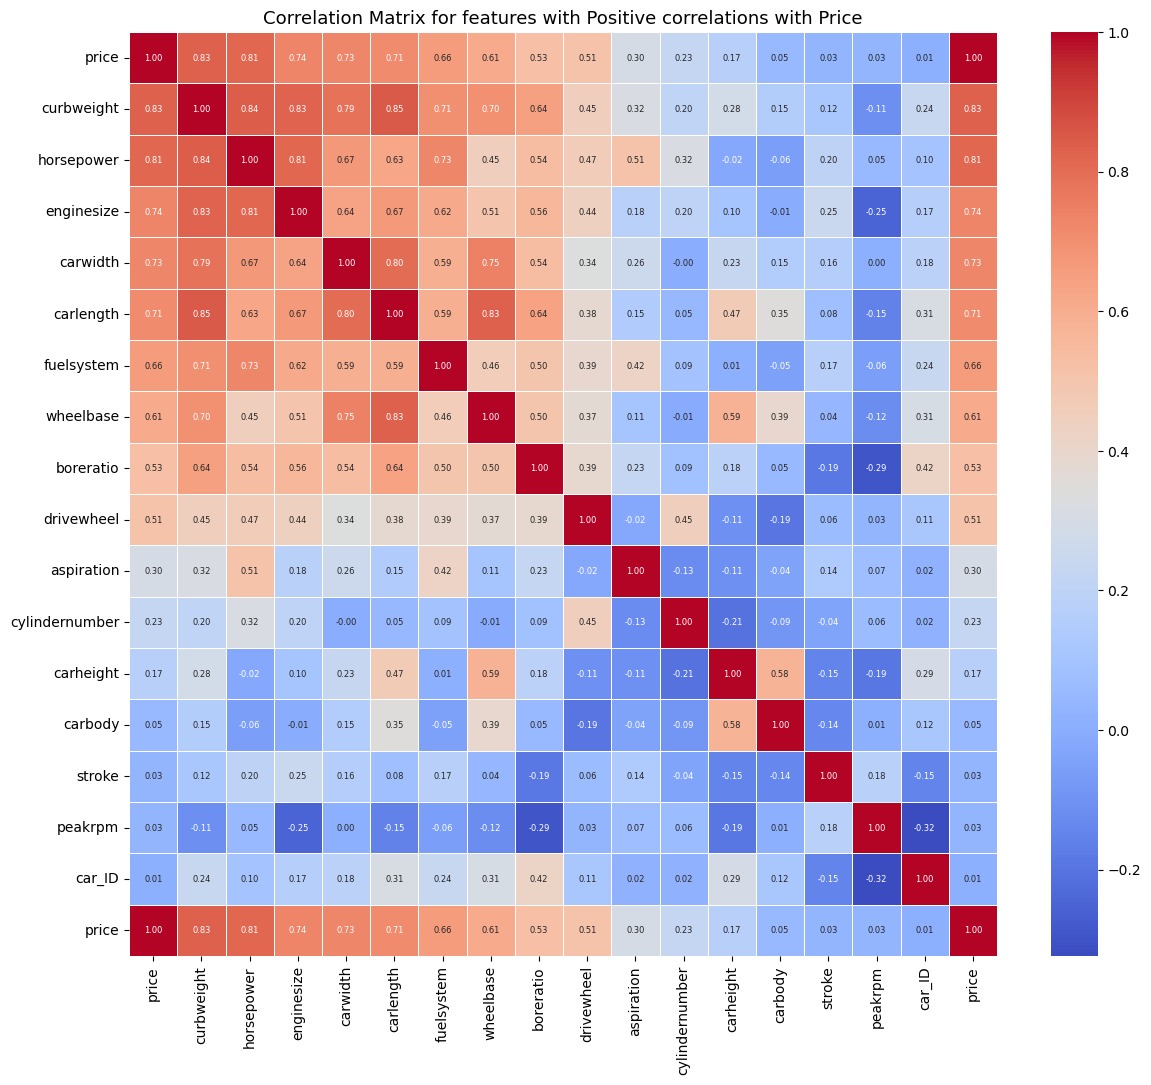

In [381]:
#Filter the correlation table for positive correlation values
positive_correlations = correlation_table[correlation_table["Correlation with Price"]>0]
# Extract the feature names with positive correlation
positive_features = positive_correlations.index.tolist()
#Create a subset with postive correlations
positive_correlation_matrix = df[positive_features + ["price"]].corr()
#Create heatmap
plt.figure(figsize=(14, 12))  
sns.heatmap(positive_correlation_matrix,annot=True,fmt=".2f",  # Format the annotations to 2 decimal places
    annot_kws={"size": 6}, 
    cmap="coolwarm",
    linewidths=0.5)
plt.title("Correlation Matrix for features with Positive correlations with Price",fontsize = 13)
plt.show()

In [395]:
#Calculate correlation 
corr_matrix = df.corr()
#Extract correlation values with target variable 
corr_with_price = corr_matrix['price'].abs().sort_values(ascending = False)
#Print top 10 features most strongly correlated with price
print(corr_with_price.head(10))

price         1.000000
curbweight    0.833269
horsepower    0.813869
citympg       0.783996
highwaympg    0.771273
enginesize    0.735237
carwidth      0.731055
carlength     0.713961
fuelsystem    0.658798
wheelbase     0.609370
Name: price, dtype: float64


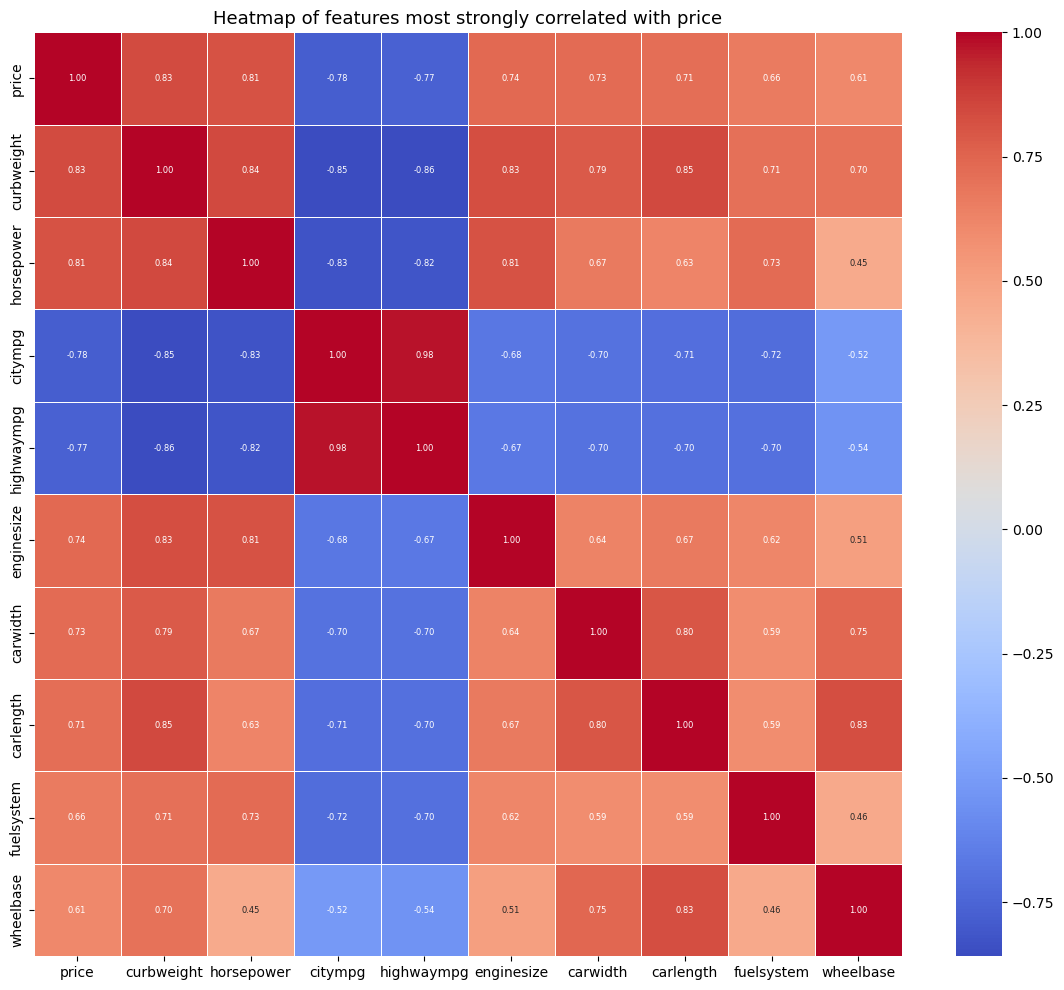

In [397]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#Plot heatmap of top features most strongly correlated with price
plt.figure(figsize=(14, 12))  
sns.heatmap(corr_matrix[corr_with_price.index[:10]].loc[corr_with_price.index[:10]],annot=True,fmt=".2f",  # Format the annotations to 2 decimal places
    annot_kws={"size": 6}, 
    cmap="coolwarm",
    linewidths=0.5)
plt.title("Heatmap of features most strongly correlated with price",fontsize =13)
plt.show()

#####  <font color = lightblue>Based on the values the features with strong correlation to price are:</fonts>

 ##  <font color = lightblue>5.HYPERPARAMETER TUNING</fonts>
 ###### Perform Hyperparameter tuning and check whether the performance of the model has increased

In [399]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Define parameter grids for each model
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

param_grid_dt = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_svr = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto']
}

# Linear Regression has no hyperparameters to tune in this case
param_grid_lr = {}

# Initialize models
models = {
    "Random Forest": (RandomForestRegressor(random_state=42), param_grid_rf),
    "Gradient Boosting": (GradientBoostingRegressor(random_state=42), param_grid_gb),
    "Decision Tree": (DecisionTreeRegressor(random_state=42), param_grid_dt),
    "Support Vector Regressor": (SVR(), param_grid_svr),
    "Linear Regression": (LinearRegression(), param_grid_lr)
}

# Perform GridSearchCV and evaluate performance
best_estimators = {}
for model_name, (model, param_grid) in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    
    if param_grid:  # Skip GridSearchCV for models with no hyperparameters to tune
        grid_search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
        grid_search.fit(X_train, Y_train)
        best_model = grid_search.best_estimator_
        print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    else:
        model.fit(X_train, Y_train)  # Train model directly for Linear Regression
        best_model = model
    
    # Store the best estimator
    best_estimators[model_name] = best_model
    
    # Evaluate performance on the test set
    y_pred = best_model.predict(X_test)
    r2 = r2_score(Y_test, y_pred)
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    print(f"{model_name} Performance after Hyperparameter Tuning:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(" " * 50)

Performing GridSearchCV for Random Forest...
Best parameters for Random Forest: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest Performance after Hyperparameter Tuning:
R-squared: 0.7866
Mean Squared Error: 6010632.8246
Mean Absolute Error: 1301.6571
                                                  
Performing GridSearchCV for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Gradient Boosting Performance after Hyperparameter Tuning:
R-squared: 0.8009
Mean Squared Error: 5607930.6786
Mean Absolute Error: 1294.8311
                                                  
Performing GridSearchCV for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Decision Tree Performance after Hyperparameter Tuning:
R-squared: 0.7542
Mean Squared Error: 6923720.3182
Mean Absolute Error: 1422.8016
    

After tuning , SUPPORT VECTOR REGRESSOR Shows more variations and significant improvement on R Squared value  that increases from -0.0588 to 0.6769 and  decrease in the MSE and MAE values . Other models like Decisiontree regressor , randomforest regressor and Gradientboosting regressor show slight changes in values.By concluding , After hyperparameter tuning ,Support vector model performance has increased.